# <center> Keras Neural Network
**Summary of Actions**
* Custom RMSE evaluation metric on logged values
* A simlpe rangom forest regressor model
 

### Import Preliminaries

In [2]:
%matplotlib inline

# Import modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from math import sqrt

# Import data
train_df = pd.DataFrame(pd.read_csv(
    'Data/featured_train_df.csv', index_col='Id'))
test_df = pd.DataFrame(pd.read_csv(
    'Data/featured_test_df.csv', index_col='Id'))

# Set pandas options
pd.set_option('precision', 1)
pd.set_option('max_columns', 100)
pd.set_option('max_rows', 100)
pd.set_option('precision', 3)

# List of dataframe
dfs = [train_df, test_df]

### DataFrame to Values

In [3]:
# Convert training and test data to values
X = train_df.loc[:, train_df.columns != 'SalePrice'].copy().values
y = train_df.SalePrice.values
X_test = test_df.values

### Train Test Split the Data

In [26]:
from sklearn.model_selection import train_test_split

x_train, y_train, x_val, y_val = train_test_split(X, y, shuffle=True, test_size=0.30)

In [27]:
x_val.shape

(1022,)

### Keras Regression Model

In [29]:
from keras.layers import Dense
from keras.models import Sequential

model = Sequential()
model.add(Dense(64, activation='relu', 
          input_shape=(x_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse',
             metrics=['mae'])

model.fit(x_train, x_val)

Epoch 1/10
1022/1022 [==============================] - 1s 496us/step - loss: 35601048473.8004 - mean_absolute_error: 173352.1733
Epoch 2/10
1022/1022 [==============================] - 0s 61us/step - loss: 28598439619.3816 - mean_absolute_error: 152999.9065
Epoch 3/10
1022/1022 [==============================] - 0s 55us/step - loss: 19055095972.3209 - mean_absolute_error: 118797.1359
Epoch 4/10
1022/1022 [==============================] - 0s 55us/step - loss: 10936003888.5949 - mean_absolute_error: 80120.1047
Epoch 5/10
1022/1022 [==============================] - 0s 64us/step - loss: 7599624665.9256 - mean_absolute_error: 53156.5943
Epoch 6/10
1022/1022 [==============================] - 0s 54us/step - loss: 6572692600.4853 - mean_absolute_error: 46634.5811
Epoch 7/10
1022/1022 [==============================] - 0s 56us/step - loss: 5962625346.6301 - mean_absolute_error: 45119.5098
Epoch 8/10
1022/1022 [==============================] - 0s 64us/step - loss: 5324386009.4247 - mean_abs

### Model Predictions

In [30]:
# create predictions dataframe
predictions = pd.DataFrame(test_df.index)
saleprice = pd.DataFrame(model.predict(X_test),
                          columns=['SalePrice'])
predictions = pd.concat([predictions, saleprice],axis=1)

# View test predictions

In [31]:
# View training predictions
train_df_prediction = pd.DataFrame(model.predict(X), columns=['Pred SalePrice'])
train_df_prediction = train_df_prediction.set_index(train_df.index)
train_df_prediction = pd.concat([train_df['SalePrice'], train_df_prediction], axis=1)
train_df_prediction.sample(3)

,SalePrice,Pred SalePrice
Id,,
1001,82000.0,141600.844
1305,130000.0,154286.672
815,116000.0,154009.984


### Residual Plot

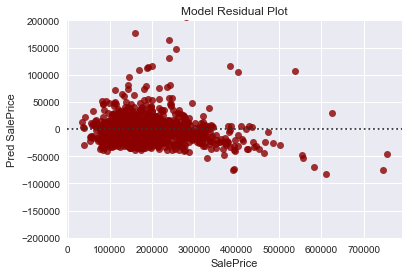

In [32]:
# Plotting training data residuals
residplot = sns.residplot(
    train_df.SalePrice, train_df_prediction['Pred SalePrice'], color='darkred')
plt.title('Model Residual Plot')
residplot.set(ylim=(-200000, 200000))
residplot

### Model Crossvalidation

In [39]:
# Creating list to store KFold scores
scores = list()

# Retrieve KFold scorse on test data, 10 folds
kf = KFold(n_splits=10)
for train_index, test_index in kf.split(X):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model.fit(X_train, y_train)

    y_pred = pd.Series(model.predict(X_test))
    y_test = pd.Series(y_test)

    rmse = sqrt(mean_squared_error(np.log(y_test), np.log(np.abs(y_pred))))

    scores.append(rmse)

# Mean Logged RMSE Evaulation metric for our model
scores = pd.Series(scores, name='Scores')
print('Logged RMSE:', round(scores.mean(),4))

Epoch 1/10
1314/1314 [==============================] - 0s 59us/step - loss: 2640842442.8128 - mean_absolute_error: 34046.2374
Epoch 2/10
1314/1314 [==============================] - 0s 64us/step - loss: 2543145620.0670 - mean_absolute_error: 33276.9018
Epoch 3/10
1314/1314 [==============================] - 0s 53us/step - loss: 2484376027.1134 - mean_absolute_error: 32684.4861
Epoch 4/10
1314/1314 [==============================] - 0s 56us/step - loss: 2412941764.7976 - mean_absolute_error: 31710.5389
Epoch 5/10
1314/1314 [==============================] - 0s 61us/step - loss: 2337931603.2511 - mean_absolute_error: 30960.1069
Epoch 6/10
1314/1314 [==============================] - 0s 60us/step - loss: 2260036992.7306 - mean_absolute_error: 30351.1128
Epoch 7/10
1314/1314 [==============================] - 0s 53us/step - loss: 2231173484.0791 - mean_absolute_error: 29792.2922
Epoch 8/10
1314/1314 [==============================] - 0s 54us/step - loss: 2194313026.9467 - mean_absolute_er

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [38]:
X_test

array([[  856.,   854.,     0., ...,     0.,     0.,     0.],
       [ 1262.,     0.,     0., ...,     0.,     0.,     0.],
       [  920.,   866.,     0., ...,     0.,     0.,     0.],
       ..., 
       [ 1501.,     0.,     0., ...,     0.,     0.,     0.],
       [ 1728.,     0.,     0., ...,     0.,     0.,     0.],
       [  970.,   739.,     0., ...,     0.,     0.,     0.]])

### Export Results

In [ ]:
# Exporting data without index
predictions.to_csv('Submissions/rfg_predicition.csv', index=False)

### Accuracy Scores

<br>Feature Enginnering 1 - RMSE: 0.1529
<br>Feature Enginnering 2 - RMSE: 0.1489
<br>Feature Enginnering 3 - RMSE: 0.1503

### Kaggle Scores

<br>Feature Engineering 1 - RMSE: 0.15486
<br>Feature Engineering 2 - RMSE: 0.15934
<br>Feature Enginnering 3 - RMSE: 0.15565